In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
#loading dataset
loan_dataset = pd.read_csv("train.csv")

In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
#first 5 rows of dataset
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# number of rows and columns
loan_dataset.shape

(614, 13)

### Check the unique values in the last column (target column)

In [12]:
unique_values = loan_dataset['Loan_Status'].unique()
print("Unique target values:", unique_values)


Unique target values: ['N' 'Y']


### Check data type and number of unique values in the target column

In [13]:
target = loan_dataset['Loan_Status']
print("Data type of target:", target.dtype)
print("Number of unique values:", target.nunique())

# Determine if classification or regression
if target.nunique() < 20 and target.dtype == 'object':
    print("This is a classification problem.")
else:
    print("This is a regression problem.")


Data type of target: object
Number of unique values: 2
This is a classification problem.


## It is a Supervised Learning Problem because target column have labeles

In Un-Supervised Learning there is no labels in data or target colmn

## It is a classification because there is discrete(separate) values in target column

In [8]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### we can't handle null values using imputation(replace method) because there is categorical columns in dataset which we can't calculate there statistical measurements. So, we will drop the null values.

In [10]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# check again missing values
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Label Encoding

In [14]:
# label encoding
loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

C:\Users\MUSAB\AppData\Local\Temp\ipykernel_5588\2263234094.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)


In [16]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [17]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4) # replacing for accuracy of Algorithm

In [19]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization

check Loan Status with Education

<Axes: xlabel='Education', ylabel='count'>

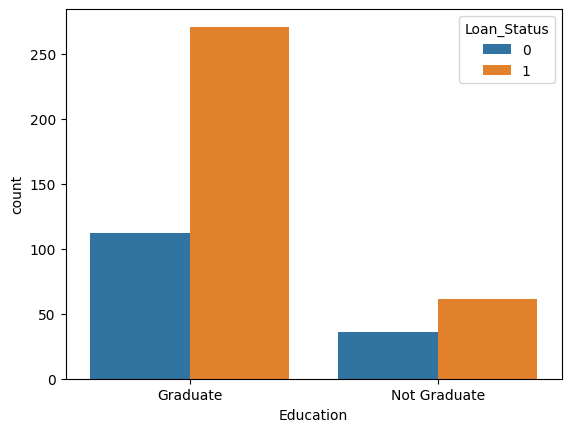

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

this chart is showing that Loan Rate is heigher for Graduate peapole then Not Graduate peapole it if a person is graduated then there is chanse company give Loan.

now check Loan Status with Martial(Married or UnMarried)

<Axes: xlabel='Married', ylabel='count'>

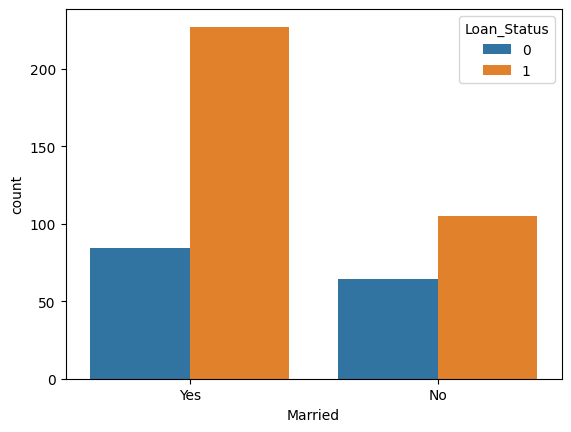

In [21]:
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

now check Loan Status with Gender

<Axes: xlabel='Gender', ylabel='count'>

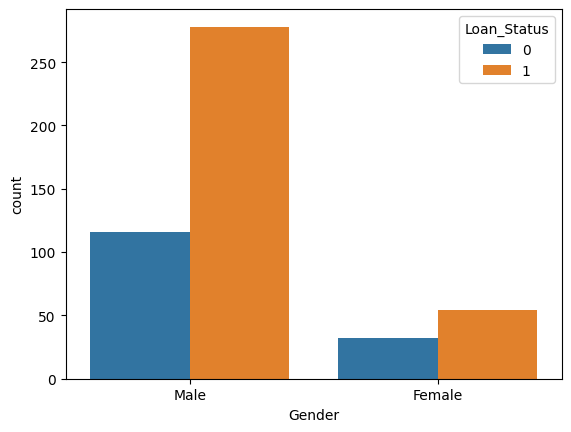

In [22]:
sns.countplot(x='Gender', hue='Loan_Status', data=loan_dataset)

now check Loan Status with Self Employed

<Axes: xlabel='Self_Employed', ylabel='count'>

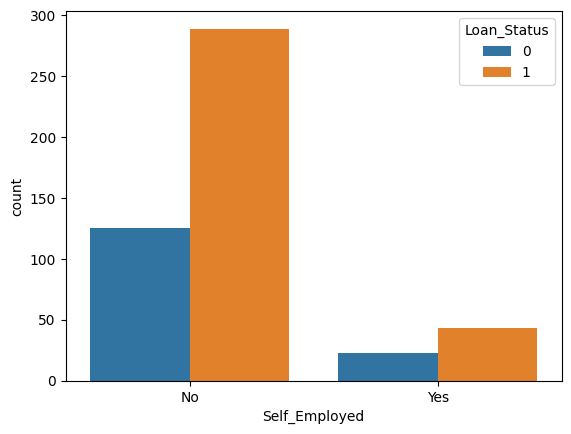

In [23]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_dataset)

convert categorical columns to numerical values

In [27]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},
                      'Gender':{'Male':1,'Female':0},
                      'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                      'Education':{'Graduate':1,'Not Graduate':0}},
                       inplace=True)

C:\Users\MUSAB\AppData\Local\Temp\ipykernel_5588\75821987.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},


In [29]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


values counts for all columns

In [ ]:
for column in loan_dataset.columns:
    print(f"Value counts for column: {column}")
    print(loan_dataset[column].value_counts(dropna=False))  # Includes NaN counts
    print("\n" + "="*50 + "\n")

Value counts for column: Loan_ID
Loan_ID
LP002936    1
LP002931    1
LP002928    1
LP002926    1
LP002917    1
           ..
LP001011    1
LP001008    1
LP001006    1
LP001005    1
LP001003    1
Name: count, Length: 480, dtype: int64


Value counts for column: Gender
Gender
1    394
0     86
Name: count, dtype: int64


Value counts for column: Married
Married
1    311
0    169
Name: count, dtype: int64


Value counts for column: Dependents
Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64


Value counts for column: Education
Education
1    383
0     97
Name: count, dtype: int64


Value counts for column: Self_Employed
Self_Employed
0    414
1     66
Name: count, dtype: int64


Value counts for column: ApplicantIncome
ApplicantIncome
2500     7
4583     6
2600     5
6000     4
4166     4
        ..
5800     1
5923     1
19484    1
3675     1
6133     1
Name: count, Length: 405, dtype: int64


Value counts for column: CoapplicantIncome
CoapplicantIncome
0.0       2

separating the data and label(target column)

In [30]:
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1) # no need for ID column and Loan_Status is our target column
Y = loan_dataset['Loan_Status']

In [31]:
display(X)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [32]:
display(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

Train Test Split

In [33]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

Support Vector Machine Model

In [35]:
classifier = svm.SVC(kernel='linear')

In [36]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

accuracy score

In [37]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [38]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [39]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [40]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [55]:
# Select the 3rd instance from X_test (index 2)
instance = X_test.iloc[1]

# Convert the instance to the correct format (DataFrame with feature names)
instance = pd.DataFrame([instance], columns=X.columns)

# Get the actual label (true value) from Y_test for the 3rd instance
actual_label = Y_test.iloc[1]

# Make prediction
prediction = classifier.predict(instance)

# Display result
if prediction[0] == 1:
    print("Loan Approved (Predicted)")
else:
    print("Loan Not Approved (Predicted)")

# Confirm with actual value
if actual_label == 1:
    print("Loan Approved (Actual)")
else:
    print("Loan Not Approved (Actual)")

# Compare the predicted and actual result
if prediction[0] == actual_label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect!")


Loan Approved (Predicted)
Loan Approved (Actual)
Prediction is correct!
